In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import scipy as stats
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/manufacturing%20process%20in%20a%20refinery.csv')
data

,Index,One,Material_1_amount,Material_2_amount,Material_3_amount,Condition,Octane Number,Unnamed: 7
0,1,1,55.33,1.72,54,1.66219,92.19,NaN
1,2,1,59.13,1.20,53,1.58399,92.74,NaN
2,3,1,57.39,1.42,55,1.61731,91.88,NaN
3,4,1,56.43,1.78,55,1.66228,92.80,NaN
4,5,1,55.98,1.58,54,1.63195,92.56,NaN
...,...,...,...,...,...,...,...,...
77,78,1,67.60,1.84,55,1.64758,91.86,NaN
78,79,1,64.81,2.24,54,1.69592,91.61,NaN
79,80,1,63.13,1.60,52,1.66118,92.17,NaN
80,81,1,63.48,3.46,52,1.48216,91.56,NaN


In [7]:
data1=data.drop('Index',axis=1)

In [8]:
data1

,One,Material_1_amount,Material_2_amount,Material_3_amount,Condition,Octane Number,Unnamed: 7
0,1,55.33,1.72,54,1.66219,92.19,NaN
1,1,59.13,1.20,53,1.58399,92.74,NaN
2,1,57.39,1.42,55,1.61731,91.88,NaN
3,1,56.43,1.78,55,1.66228,92.80,NaN
4,1,55.98,1.58,54,1.63195,92.56,NaN
...,...,...,...,...,...,...,...
77,1,67.60,1.84,55,1.64758,91.86,NaN
78,1,64.81,2.24,54,1.69592,91.61,NaN
79,1,63.13,1.60,52,1.66118,92.17,NaN
80,1,63.48,3.46,52,1.48216,91.56,NaN


In [10]:
data2=data1.drop('Unnamed: 7',axis=1)

In [11]:
data2.head(2)

,One,Material_1_amount,Material_2_amount,Material_3_amount,Condition,Octane Number
0,1,55.33,1.72,54,1.66219,92.19
1,1,59.13,1.20,53,1.58399,92.74


In [12]:
data2.tail(2)

,One,Material_1_amount,Material_2_amount,Material_3_amount,Condition,Octane Number
80,1,63.48,3.46,52,1.48216,91.56
81,1,62.25,3.56,50,1.49734,92.16


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   One                82 non-null     int64  
 1   Material_1_amount  82 non-null     float64
 2   Material_2_amount  82 non-null     float64
 3   Material_3_amount  82 non-null     int64  
 4   Condition          82 non-null     float64
 5   Octane Number      82 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.0 KB


In [14]:
data2.describe()

,One,Material_1_amount,Material_2_amount,Material_3_amount,Condition,Octane Number
count,82.0,82.00000,82.000000,82.000000,82.000000,82.000000
mean,1.0,60.17061,1.663659,55.463415,1.626571,91.849878
std,0.0,12.43740,1.901952,5.377583,0.219730,1.401124
min,1.0,4.23000,0.000000,40.000000,1.199750,89.660000
25%,1.0,55.38000,0.105000,54.000000,1.518095,90.847500
50%,1.0,62.69500,1.280000,56.000000,1.603575,91.735000
75%,1.0,67.78000,2.277500,59.750000,1.722818,92.467500
max,1.0,75.54000,10.760000,64.000000,2.319090,97.610000


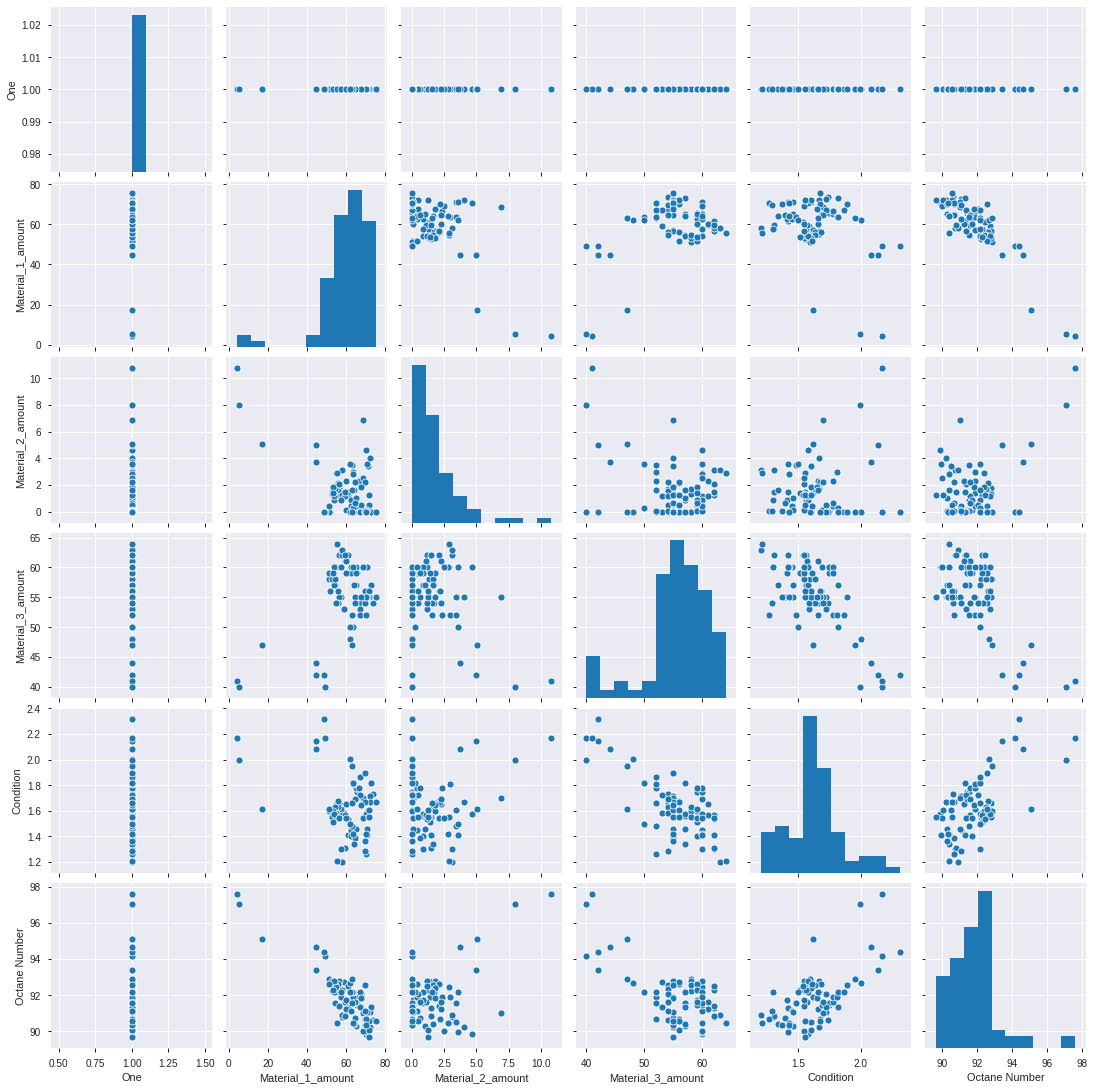

In [15]:
sns.pairplot(data2)

In [16]:
pandas_profiling.ProfileReport(data2)

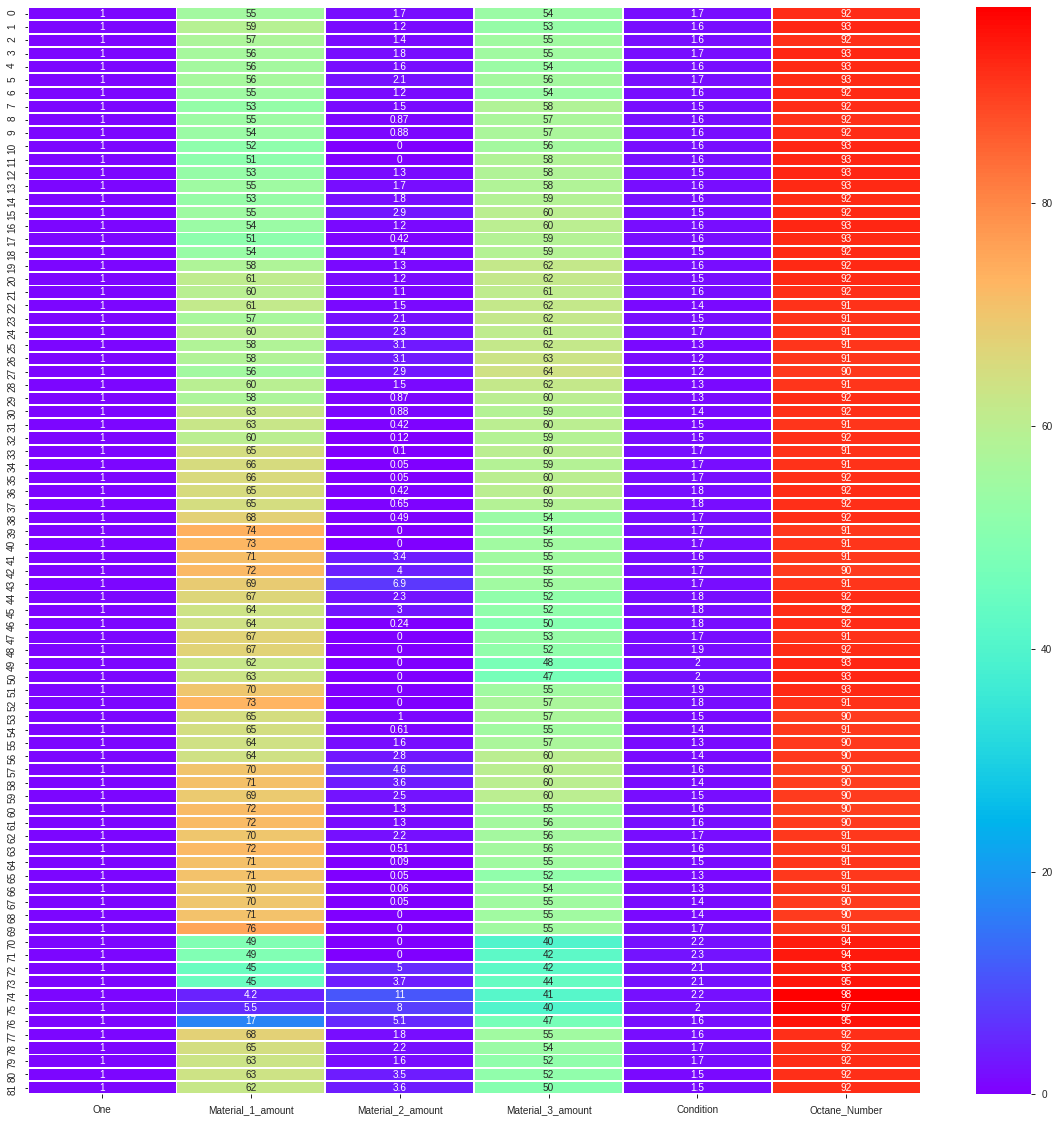

In [58]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data2,ax=ax,annot=True,linewidth=0.9,cmap='rainbow')

In [18]:
data2.columns

Index(['One', 'Material_1_amount', 'Material_2_amount', 'Material_3_amount',
       'Condition', 'Octane_Number'],
      dtype='object')

In [20]:
x_data=data2[['One', 'Material_1_amount', 'Material_2_amount', 'Material_3_amount',
       'Condition']]

In [21]:
y_data=data2['Octane_Number']

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [106]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.22)

In [107]:
model=LinearRegression(normalize=True)

In [108]:
model.fit(X_traine,Y_traine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [109]:
X_traine.shape

(63, 5)

In [117]:
train=pd.DataFrame(X_traine,Y_traine)
train

,One,Material_1_amount,Material_2_amount,Material_3_amount,Condition
Octane_Number,,,,,
90.29,NaN,NaN,NaN,NaN,NaN
92.16,NaN,NaN,NaN,NaN,NaN
91.56,NaN,NaN,NaN,NaN,NaN
92.74,NaN,NaN,NaN,NaN,NaN
92.33,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
91.86,NaN,NaN,NaN,NaN,NaN
91.01,NaN,NaN,NaN,NaN,NaN
92.19,NaN,NaN,NaN,NaN,NaN


In [118]:
train.to_csv('train_manufacturing_process_in_refinery1.csv')

In [119]:
test=pd.DataFrame(X_test,Y_test)
test

,One,Material_1_amount,Material_2_amount,Material_3_amount,Condition
Octane_Number,,,,,
90.43,NaN,NaN,NaN,NaN,NaN
92.18,NaN,NaN,NaN,NaN,NaN
95.12,NaN,NaN,NaN,NaN,NaN
92.89,NaN,NaN,NaN,NaN,NaN
90.71,NaN,NaN,NaN,NaN,NaN
92.48,NaN,NaN,NaN,NaN,NaN
92.16,NaN,NaN,NaN,NaN,NaN
91.10,NaN,NaN,NaN,NaN,NaN
89.66,NaN,NaN,NaN,NaN,NaN


In [120]:
test.to_csv('test_manufacturing_process_in_refinery.csv ')

In [110]:
Y_traine.shape

(63,)

In [111]:
X_test.shape

(19, 5)

In [112]:
Y_test.shape

(19,)

In [113]:
trine_score=model.score(X_traine,Y_traine)
trine_score

0.9053991796188465

In [114]:
test_score=model.score(X_test,Y_test)
test_score

0.9013551885777437

In [100]:
model.coef_

array([ 0.        , -0.09393678, -0.10934175, -0.01791027,  2.16474444])

In [101]:
model.intercept_

95.17338867115954

In [102]:
New_predication = model.predict(X_test)

In [103]:
pd.DataFrame({'New_predication':New_predication,
             "ActualData":Y_test,
             "Error":Y_test-New_predication,
             "MSE":np.sqrt(np.mean(Y_test-New_predication))})

/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


,New_predication,ActualData,Error,MSE
11,92.771378,92.89,0.118622,NaN
56,90.859452,90.43,-0.429452,NaN
58,90.086918,89.98,-0.106918,NaN
13,92.339448,92.55,0.210552,NaN
64,90.666428,91.06,0.393572,NaN
8,92.317923,91.56,-0.757923,NaN
49,92.801821,92.68,-0.121821,NaN
65,90.340692,90.69,0.349308,NaN
28,91.112257,90.83,-0.282257,NaN
10,92.784275,92.75,-0.034275,NaN


In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [105]:
r2_score(Y_test,New_predication)

0.7938790946228784

In [76]:
mean_squared_error(Y_test,New_predication)

0.15399646660872843

In [77]:
mean_absolute_error(Y_test,New_predication)

0.29831716562290317

In [78]:
from sklearn.model_selection import cross_val_score

In [46]:
cv = cross_val_score(model,X_traine,Y_traine,cv = 10)
cv

array([0.86602072, 0.95614178, 0.94684583, 0.64472231, 0.92659613,
       0.40327591, 0.36371031, 0.75414353, 0.62128464, 0.83633805])

In [47]:
np.min(cv)

0.36371031395215037

In [48]:
np.max(cv)

0.9561417767520277

In [49]:
np.mean(cv)

0.7319079199778052

In [121]:
np.mean(cv)

0.7319079199778052